In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from variables import *
from time_series import *

In [2]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df = pd.read_csv(train_time_series_path, dayfirst=True, 
    index_col=['Date'], parse_dates=['Date'])
df

,OCAvg,MA,Returns
Date,,,
2017-05-09 04:00:00,1684.85,1635.482143,0.003526
2017-05-09 05:00:00,1693.20,1641.950000,0.003947
2017-05-09 08:00:00,1718.20,1650.417857,0.005144
2017-05-09 09:00:00,1728.45,1659.396429,0.005425
2017-05-09 10:00:00,1724.80,1667.478571,0.004859
...,...,...,...
2018-07-09 20:00:00,6645.75,6650.050000,0.000031
2018-07-09 21:00:00,6648.65,6649.610714,-0.000066
2018-07-09 22:00:00,6649.85,6648.746429,-0.000130


In [4]:
scaler = MinMaxScaler()
train_values = scaler.fit_transform(df[['Returns']].values)

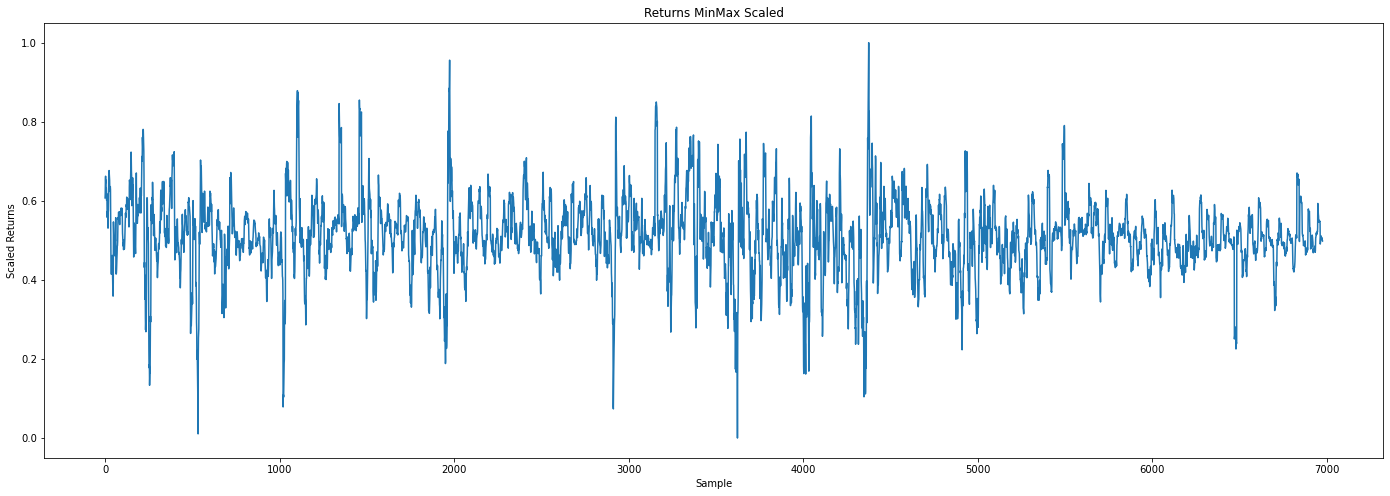

In [5]:
fig = plt.figure(figsize=(24, 8))
ax1 = fig.subplots(1)
ax1.set_title('Returns MinMax Scaled')
ax1.set(xlabel='Sample', ylabel='Scaled Returns')
ax1.plot(train_values)

In [6]:
X, y = get_train(train_values, window_size)

X (6912, 64, 1), y (6912, 1)


In [7]:
'''validate_time_series_path'''
df_val = pd.read_csv(validate_time_series_path, dayfirst = True, usecols=['Date','Returns'],
    index_col=['Date'], parse_dates=['Date'])
df_val['Scaled'] = scaler.transform(df_val[['Returns']].values)
X_val, y_val = get_val(df_val['Scaled'].values, window_size)

data/btcusd-validate.csv
X (2912, 64, 1), y (2912,)


In [8]:
model = Sequential()
model.add(LSTM(76, input_shape=(X.shape[1], 1), return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam()
model.compile(loss="mse", optimizer=optimizer)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 76)                23712     
_________________________________________________________________
dropout (Dropout)            (None, 76)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 77        
Total params: 23,789
Trainable params: 23,789
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
history = model.fit(X, y, validation_data=(X_val, y_val), epochs = epochs, batch_size = batch_size, shuffle=False, verbose = 2)

Epoch 1/200
216/216 - 7s - loss: 0.0103 - val_loss: 0.0014
Epoch 2/200
216/216 - 7s - loss: 0.0041 - val_loss: 0.0011
Epoch 3/200
216/216 - 6s - loss: 0.0033 - val_loss: 8.2415e-04
Epoch 4/200
216/216 - 7s - loss: 0.0030 - val_loss: 7.8090e-04
Epoch 5/200
216/216 - 7s - loss: 0.0028 - val_loss: 7.0497e-04
Epoch 6/200
216/216 - 8s - loss: 0.0025 - val_loss: 6.7939e-04
Epoch 7/200
216/216 - 6s - loss: 0.0025 - val_loss: 6.1494e-04
Epoch 8/200
216/216 - 7s - loss: 0.0023 - val_loss: 6.5463e-04
Epoch 9/200
216/216 - 6s - loss: 0.0021 - val_loss: 5.4083e-04
Epoch 10/200
216/216 - 6s - loss: 0.0020 - val_loss: 5.7743e-04
Epoch 11/200
216/216 - 8s - loss: 0.0019 - val_loss: 4.7059e-04
Epoch 12/200
216/216 - 7s - loss: 0.0018 - val_loss: 4.5910e-04
Epoch 13/200
216/216 - 6s - loss: 0.0017 - val_loss: 4.1708e-04
Epoch 14/200
216/216 - 6s - loss: 0.0015 - val_loss: 4.3305e-04
Epoch 15/200
216/216 - 6s - loss: 0.0015 - val_loss: 3.8027e-04
Epoch 16/200
216/216 - 6s - loss: 0.0014 - val_loss: 3.64

In [10]:
save_model(model, model_path)
joblib.dump(scaler, scaler_path) 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/btcusd-32-64-14\assets


['scalers/btcusd-32-64-14.bin']